
### Clustering

In unsupervices learning, we have to ans two questions
      
      How many groups/Clusters?
      What are the Clusters?

==>  To cluster/group some points together, we have to take note of "Homogenity" and "Seperation". Between two same group members, there must be homogenity, meaning they must be close. There must be sufficient separation between two different groups.



We'll cluster using the K-means algorithm. 

    ______
    |\  /|           
    | \/ |  ====> Means is the point where the two diagonals intersect
    | /\ |
    |/  \|
    ``````
    
In K - means, there will be K number of points called centroids or cluster centers and then assign the points under a cluster depending on the distance from the centroids to the point.



Kmeans (points, K)

    1. Intialize k centers randomly - c1, c2, c3...........cK
    2. Loop:
        3. Label all the instances using existing cluster centers
        4. Update each centroid by taking mean
        
    5. J = cost function = sum(dist(pi, cj)) ---------> for all j


In [1]:
#Initial imports :-

import pandas as pn
import numpy as np
import math
import random as rand
import matplotlib.pyplot as plt
%matplotlib inline



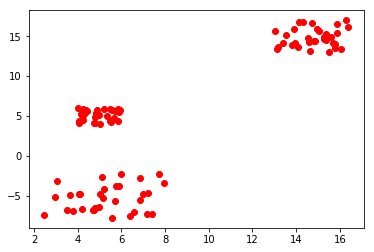

In [4]:
# Reading input
data = pn.read_csv("clustering1.csv", header=None)
data = np.asarray(data)

X = data[:,:data.shape[1]]

f1 = X[:,0]
f2 = X[:,1]
X = np.array(list(zip(f1, f2)))







# Plotting

color = ['red']
plt.scatter(f1, f2, c = color)

In [6]:
# Euclidean Distance
def dist(a, b):
    res = (a[0] - b[0]) * (a[0] - b[0])
    res = res + (a[1] - b[1]) * (a[1] - b[1])
    
    res = math.sqrt(res)
    
    return res


----- With Random ------


TypeError: only size-1 arrays can be converted to Python scalars

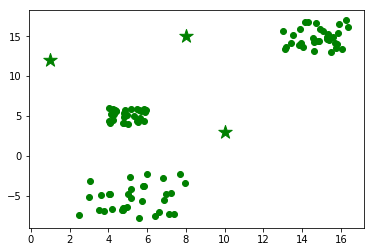

In [11]:
# K - means
def K_means(points, k):
    
    # Assigning random values
    C_x = np.random.randint(0, np.max(points), size = k)
    C_y = np.random.randint(0, np.max(points), size = k)
    
    C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
    
    
    print ("----- With Random ------")
    # Plotting along with the Centroids
    plt.scatter(f1, f2, c='green')
    plt.scatter(C_x, C_y, marker='*', s=200, c='g')
    
    
    # To store the value of centroids when it updates, initially all zero
    C_old = np.zeros(C.shape)
    
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    
    
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old)
    
    
    # Loop will run till the error becomes zero
    while error != 0:
        
        # Assigning each value to its closest cluster
        for i in range(len(points)):
            distances = dist(points[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            
        # Storing the old centroid values
        C_old = C
        
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old)
        
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

K_means(X, 3)
